In [1]:
import pandas as pd
import string
import re
from nltk import word_tokenize , sent_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,SnowballStemmer

In [2]:
data = pd.read_csv("Pro_1_K8 Reviews v0.2.csv",encoding= "utf-8")

In [3]:
data

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...
...,...,...
14670,1,"I really like the phone, Everything is working..."
14671,1,The Lenovo K8 Note is awesome. It takes best p...
14672,1,Awesome Gaget.. @ this price
14673,1,This phone is nice processing will be successf...


In [4]:
reviews = list(review.lower() for review in data["review"].values)

In [5]:
def remove_punc(sent):
    punc = list(string.punctuation)
    for i in punc:
        if i in sent:
            sent = sent.replace(i," ")
    if "\n" in sent:
        sent = sent.replace("\n"," ")
    sent = sent.replace("\d*", " ")
    return sent.strip()    

In [6]:
def remove_emoji(sent) :
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return (emoji_pattern.sub(r'', sent))

In [7]:
stop_words = stopwords.words("english")
def remove_stopwords(words):
    words = [word for word in words if word not in stop_words]
    words = [word for word in words if len(word)>2]
    return words   

In [8]:
def lemma(words):
    lemma_words = []
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer("english")
    for i in words:
        l = stemmer.stem(WordNetLemmatizer().lemmatize(i, pos='v'))
        lemma_words.append(l)
    return lemma_words  

In [9]:
def process_text(list_of_docs):
    all_words = []
    for i in list_of_docs:
        sentences = sent_tokenize(i)
        temp = []
        for sent in sentences:
            sent = remove_punc(sent)
            sent = remove_emoji(sent)
            words = word_tokenize(sent)
            words = remove_stopwords(words)
            words = lemma(words)
            temp.extend(word for word in words)
        all_words.append(temp)
    return all_words

In [10]:
processed_reviews = process_text(reviews)

In [11]:
print(processed_reviews[:3])

[['good', 'need', 'updat', 'improv'], ['worst', 'mobil', 'buy', 'ever', 'batteri', 'drain', 'like', 'hell', 'backup', 'hour', 'internet', 'use', 'even', 'put', 'mobil', 'idl', 'get', 'discharg', 'biggest', 'lie', 'amazon', 'lenov', 'expect', 'make', 'full', 'say', 'batteri', '4000mah', 'booster', 'charger', 'fake', 'take', 'least', 'hour', 'fulli', 'charg', 'know', 'lenovo', 'surviv', 'make', 'full', 'pleas', 'els', 'regret', 'like'], ['get', 'cash', 'back', 'alreadi', 'januari']]


In [12]:
def pos_tags(reviews):
    tags = []
    tags.extend(list(pos_tag(i) for i in reviews))
    return tags

In [13]:
processed_review_tags = pos_tags(processed_reviews)

In [14]:
print(processed_review_tags[:3])

[[('good', 'JJ'), ('need', 'NN'), ('updat', 'NNS'), ('improv', 'VB')], [('worst', 'JJS'), ('mobil', 'NN'), ('buy', 'VB'), ('ever', 'RB'), ('batteri', 'RB'), ('drain', 'VBP'), ('like', 'IN'), ('hell', 'NN'), ('backup', 'IN'), ('hour', 'NN'), ('internet', 'NN'), ('use', 'NN'), ('even', 'RB'), ('put', 'VBD'), ('mobil', 'RP'), ('idl', 'JJ'), ('get', 'NN'), ('discharg', 'JJ'), ('biggest', 'JJS'), ('lie', 'NN'), ('amazon', 'NN'), ('lenov', 'NN'), ('expect', 'VBP'), ('make', 'VBP'), ('full', 'JJ'), ('say', 'VBP'), ('batteri', 'JJ'), ('4000mah', 'CD'), ('booster', 'NN'), ('charger', 'NN'), ('fake', 'VBP'), ('take', 'VB'), ('least', 'JJS'), ('hour', 'NN'), ('fulli', 'JJ'), ('charg', 'NN'), ('know', 'VBP'), ('lenovo', 'VBZ'), ('surviv', 'NNS'), ('make', 'VBP'), ('full', 'JJ'), ('pleas', 'NNS'), ('els', 'VBP'), ('regret', 'NNS'), ('like', 'IN')], [('get', 'VB'), ('cash', 'NN'), ('back', 'RB'), ('alreadi', 'JJ'), ('januari', 'NN')]]


In [15]:
def extract_nouns_(reviews):
    noun_tags =[]
    for i in reviews:
        nouns = []
        for tag in i:
            if str(tag[1][0])== "N":
                nouns.append(tag)
        noun_tags.append(nouns)   
    
    return noun_tags

In [16]:
processed_review_nouns = extract_nouns_(processed_review_tags)

In [17]:
print(processed_review_nouns[:4])

[[('need', 'NN'), ('updat', 'NNS')], [('mobil', 'NN'), ('hell', 'NN'), ('hour', 'NN'), ('internet', 'NN'), ('use', 'NN'), ('get', 'NN'), ('lie', 'NN'), ('amazon', 'NN'), ('lenov', 'NN'), ('booster', 'NN'), ('charger', 'NN'), ('hour', 'NN'), ('charg', 'NN'), ('surviv', 'NNS'), ('pleas', 'NNS'), ('regret', 'NNS')], [('cash', 'NN'), ('januari', 'NN')], []]


In [18]:
review_noun_text = []
for i in processed_review_nouns:
    sent = []
    for tag_word in i:
        sent.append(tag_word[0])
    review_noun_text.append(sent)        

In [20]:
import gensim

In [21]:
dictionary = gensim.corpora.Dictionary(review_noun_text)

In [22]:
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

In [23]:
bow_corpus = [dictionary.doc2bow(doc) for doc in review_noun_text]

In [24]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 12, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [25]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.082*"perform" + 0.069*"awesom" + 0.048*"game" + 0.044*"processor" + 0.042*"mode" + 0.034*"depth" + 0.023*"lag" + 0.021*"heavi" + 0.018*"backup" + 0.018*"play"


Topic: 1 
Words: 0.230*"price" + 0.088*"rang" + 0.053*"look" + 0.047*"superb" + 0.045*"budget" + 0.034*"amaz" + 0.027*"gud" + 0.026*"perform" + 0.016*"class" + 0.016*"littl"


Topic: 2 
Words: 0.046*"thank" + 0.043*"deliveri" + 0.033*"app" + 0.030*"support" + 0.030*"avail" + 0.030*"headphon" + 0.027*"good" + 0.027*"miss" + 0.026*"amazon" + 0.025*"card"


Topic: 3 
Words: 0.093*"use" + 0.091*"note" + 0.033*"drain" + 0.029*"charg" + 0.022*"hour" + 0.021*"day" + 0.021*"lenovo" + 0.021*"time" + 0.019*"devic" + 0.018*"compar"


Topic: 4 
Words: 0.073*"issu" + 0.051*"call" + 0.026*"day" + 0.026*"problem" + 0.025*"replac" + 0.023*"time" + 0.023*"speaker" + 0.020*"connect" + 0.020*"network" + 0.019*"use"


Topic: 5 
Words: 0.080*"amazon" + 0.062*"network" + 0.062*"return" + 0.040*"buy" + 0.033*"lenovo" + 0.031*"custo

In [26]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts= review_noun_text, dictionary = dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.497730063037914


In [27]:
coherence = []
for k in range(5,25):
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = k, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)
    
    cm = CoherenceModel(model=lda_model,texts=review_noun_text,
         dictionary=dictionary, coherence='c_v')   
                                                
    coherence.append((k,cm.get_coherence()))

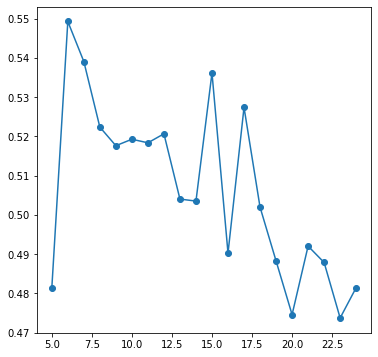

In [28]:
from matplotlib import pyplot as plt
plt.figure(figsize= (6,6))
topics =[i[0] for i in coherence]
coherence_values =[i[1] for i in coherence]
plt.plot(topics,coherence_values ,  marker = 'o')

# optical num of topics = 6

In [29]:
lda_model_2 =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 6, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [30]:
for idx, topic in lda_model_2.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.121*"charg" + 0.055*"use" + 0.046*"time" + 0.041*"hour" + 0.038*"day" + 0.036*"drain" + 0.031*"problem" + 0.026*"get" + 0.024*"hang" + 0.021*"turbo"


Topic: 1 
Words: 0.087*"problem" + 0.041*"lenovo" + 0.040*"issu" + 0.031*"price" + 0.027*"amazon" + 0.026*"perform" + 0.026*"month" + 0.021*"buy" + 0.020*"servic" + 0.020*"day"


Topic: 2 
Words: 0.099*"note" + 0.052*"awesom" + 0.035*"excel" + 0.032*"lenovo" + 0.025*"superb" + 0.023*"backup" + 0.023*"price" + 0.023*"featur" + 0.021*"compar" + 0.019*"budget"


Topic: 3 
Words: 0.097*"money" + 0.048*"return" + 0.037*"wast" + 0.032*"featur" + 0.028*"charger" + 0.027*"support" + 0.027*"valu" + 0.023*"cast" + 0.022*"box" + 0.021*"screen"


Topic: 4 
Words: 0.059*"call" + 0.029*"network" + 0.025*"record" + 0.022*"app" + 0.021*"sim" + 0.021*"speaker" + 0.020*"option" + 0.018*"hai" + 0.016*"time" + 0.015*"show"


Topic: 5 
Words: 0.047*"qualiti" + 0.025*"rang" + 0.025*"price" + 0.023*"perform" + 0.023*"look" + 0.022*"mode" + 0

In [31]:
coherence_model_lda_2 = CoherenceModel(model=lda_model_2, texts= review_noun_text, dictionary = dictionary, coherence='c_v')
coherence_lda_2 = coherence_model_lda_2.get_coherence()

print('\nCoherence Score for II Model: ', coherence_lda_2)


Coherence Score for II Model:  0.5110540365773346


In [84]:
topics = lda_model_2.show_topics(formatted= False )

In [97]:
index = []
values = []
for i in range(6):
    index.append(str("Topic ")+ str(i+1))
    k = dict(topics[i][1])
    values.append(k.keys())
    
top_ten_words = pd.DataFrame(values,index)    

In [98]:
top_ten_words

,0,1,2,3,4,5,6,7,8,9
Topic 1,charg,use,time,hour,day,drain,problem,get,hang,turbo
Topic 2,problem,lenovo,issu,price,amazon,perform,month,buy,servic,day
Topic 3,note,awesom,excel,lenovo,superb,backup,price,featur,compar,budget
Topic 4,money,return,wast,featur,charger,support,valu,cast,box,screen
Topic 5,call,network,record,app,sim,speaker,option,hai,time,show
Topic 6,qualiti,rang,price,perform,look,mode,sound,game,depth,averag
